In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#load the data

df=pd.read_csv(r"C:\Users\Prerana\Downloads\50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


EDA

In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#Checking for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#checking for duplicate values
df.duplicated().sum()

0

In [7]:
df.drop(columns='State',inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [8]:
df.rename(columns={'R&D Spend':'R_DSpend',
                  'Marketing Spend':'MarketingSpend'},inplace=True)
df.head()

,R_DSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


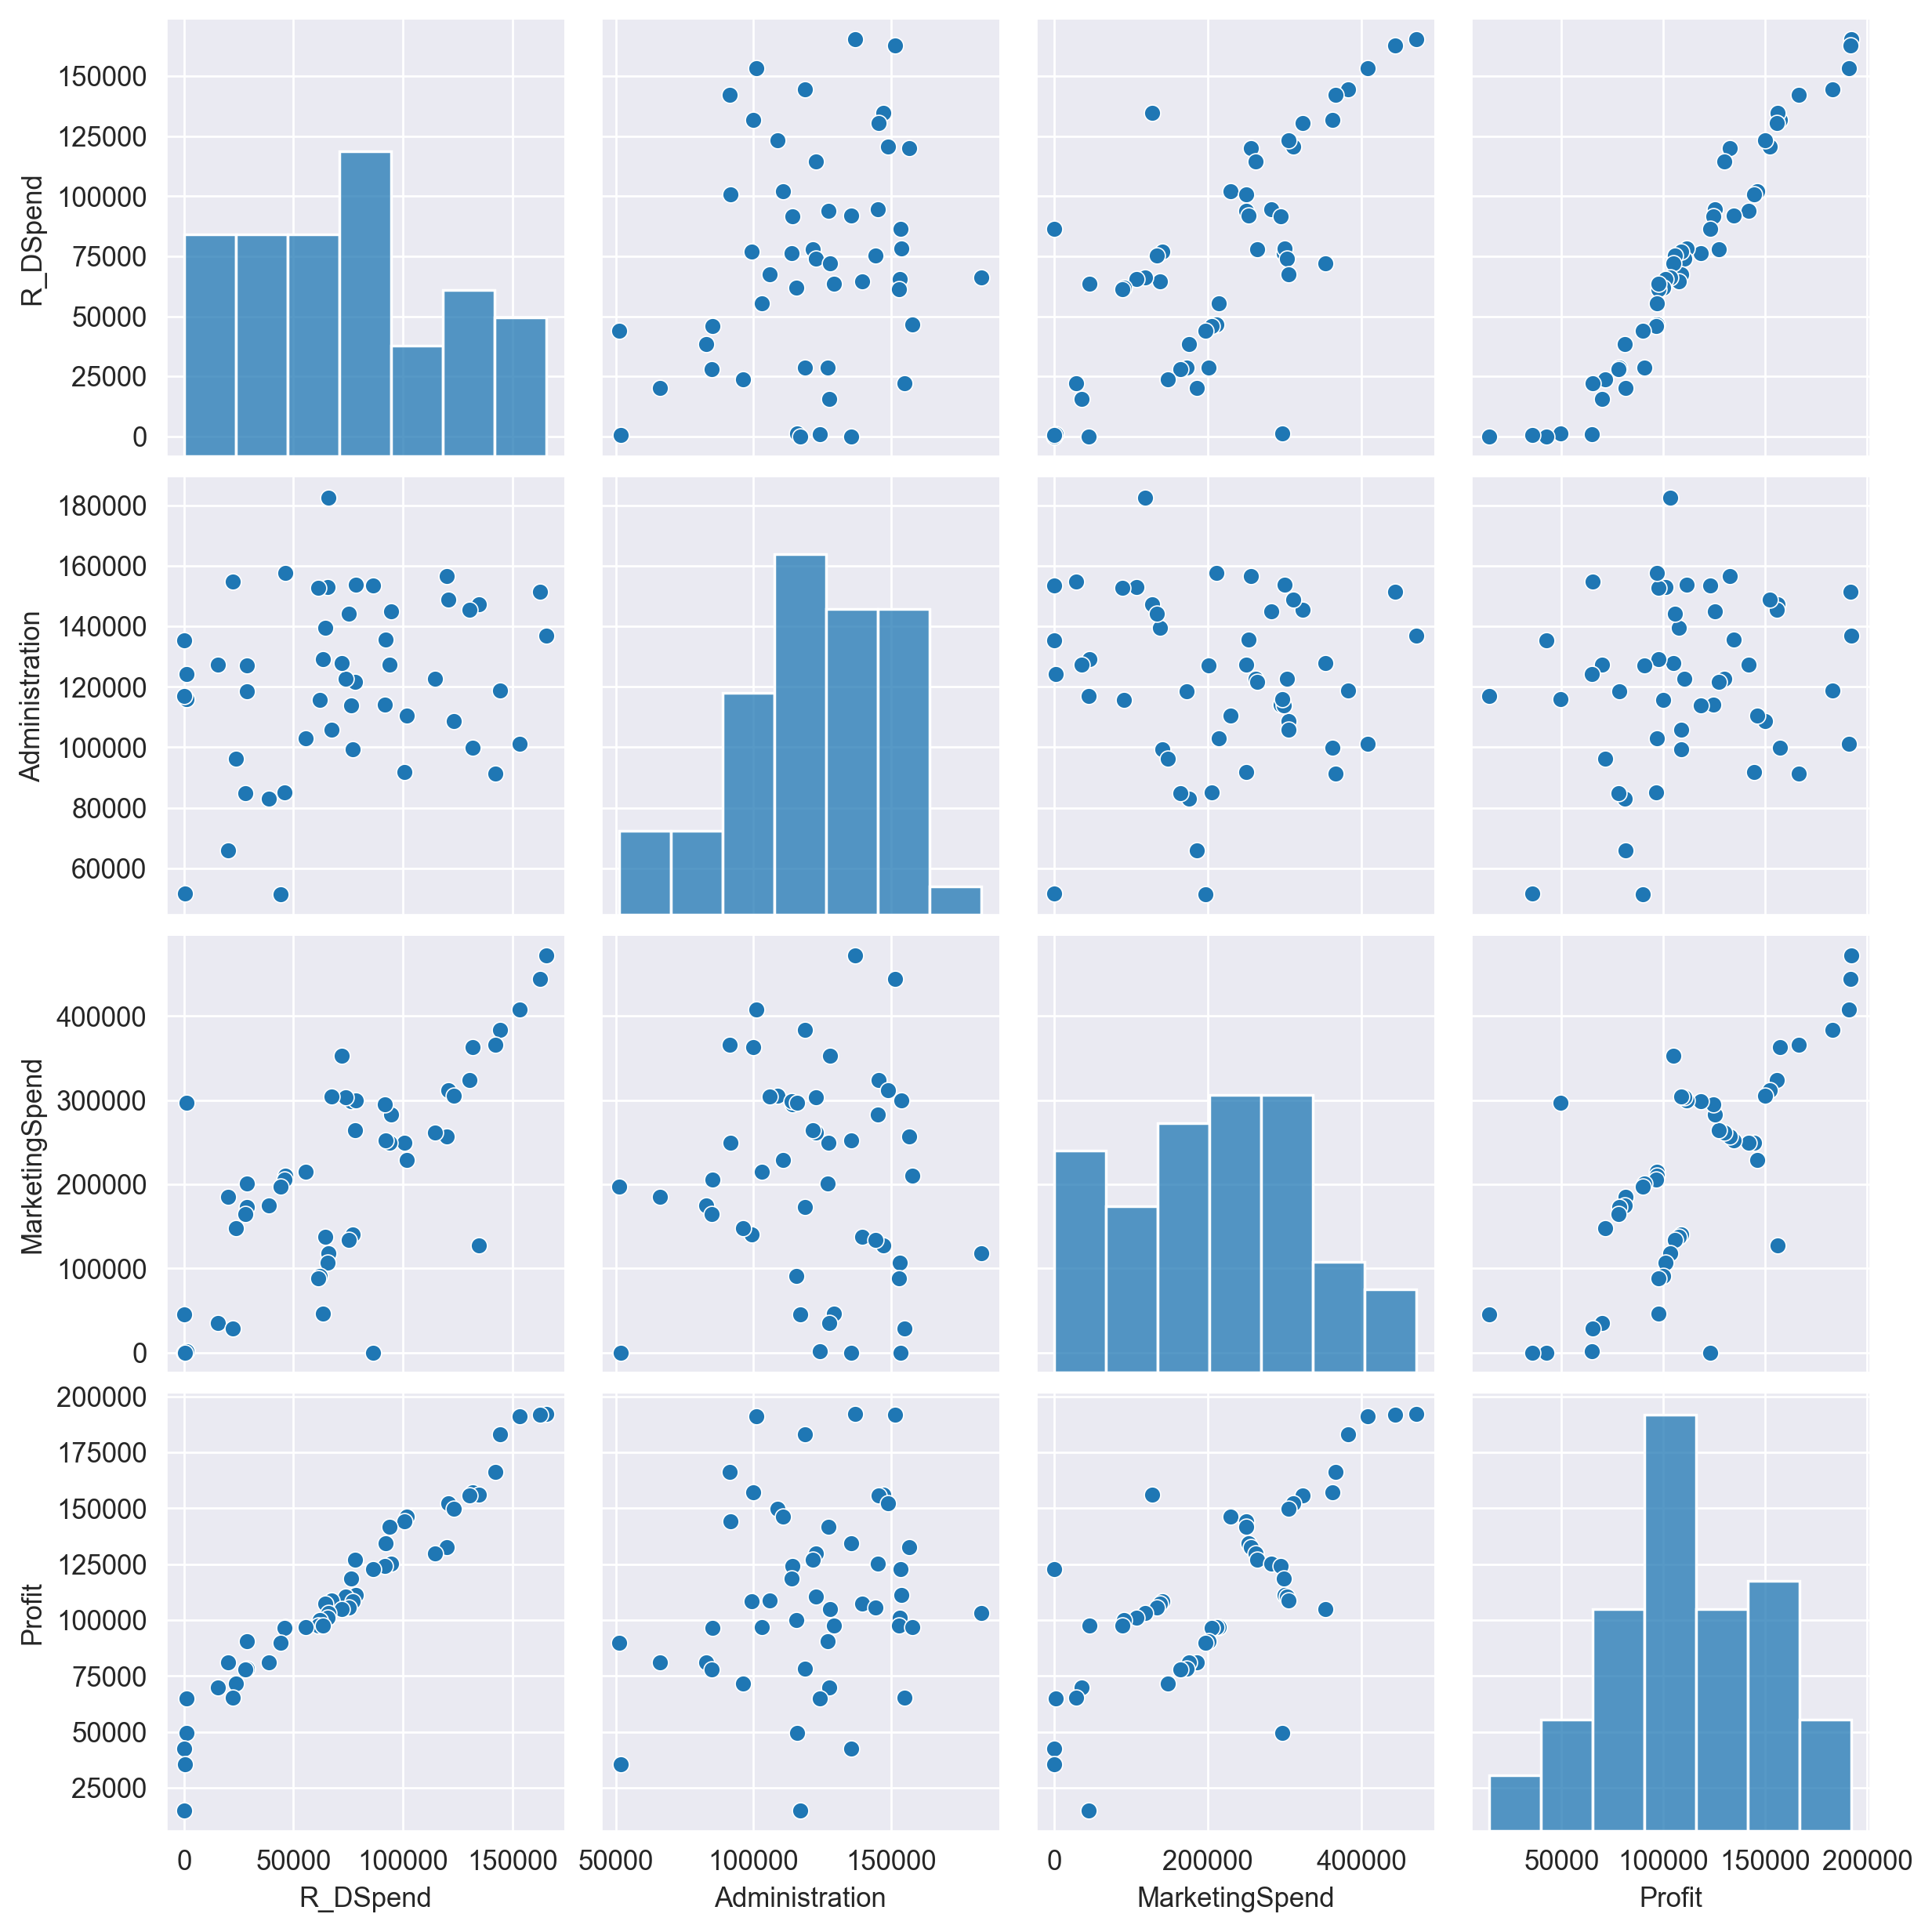

In [9]:
sns.pairplot(df)

<AxesSubplot:>

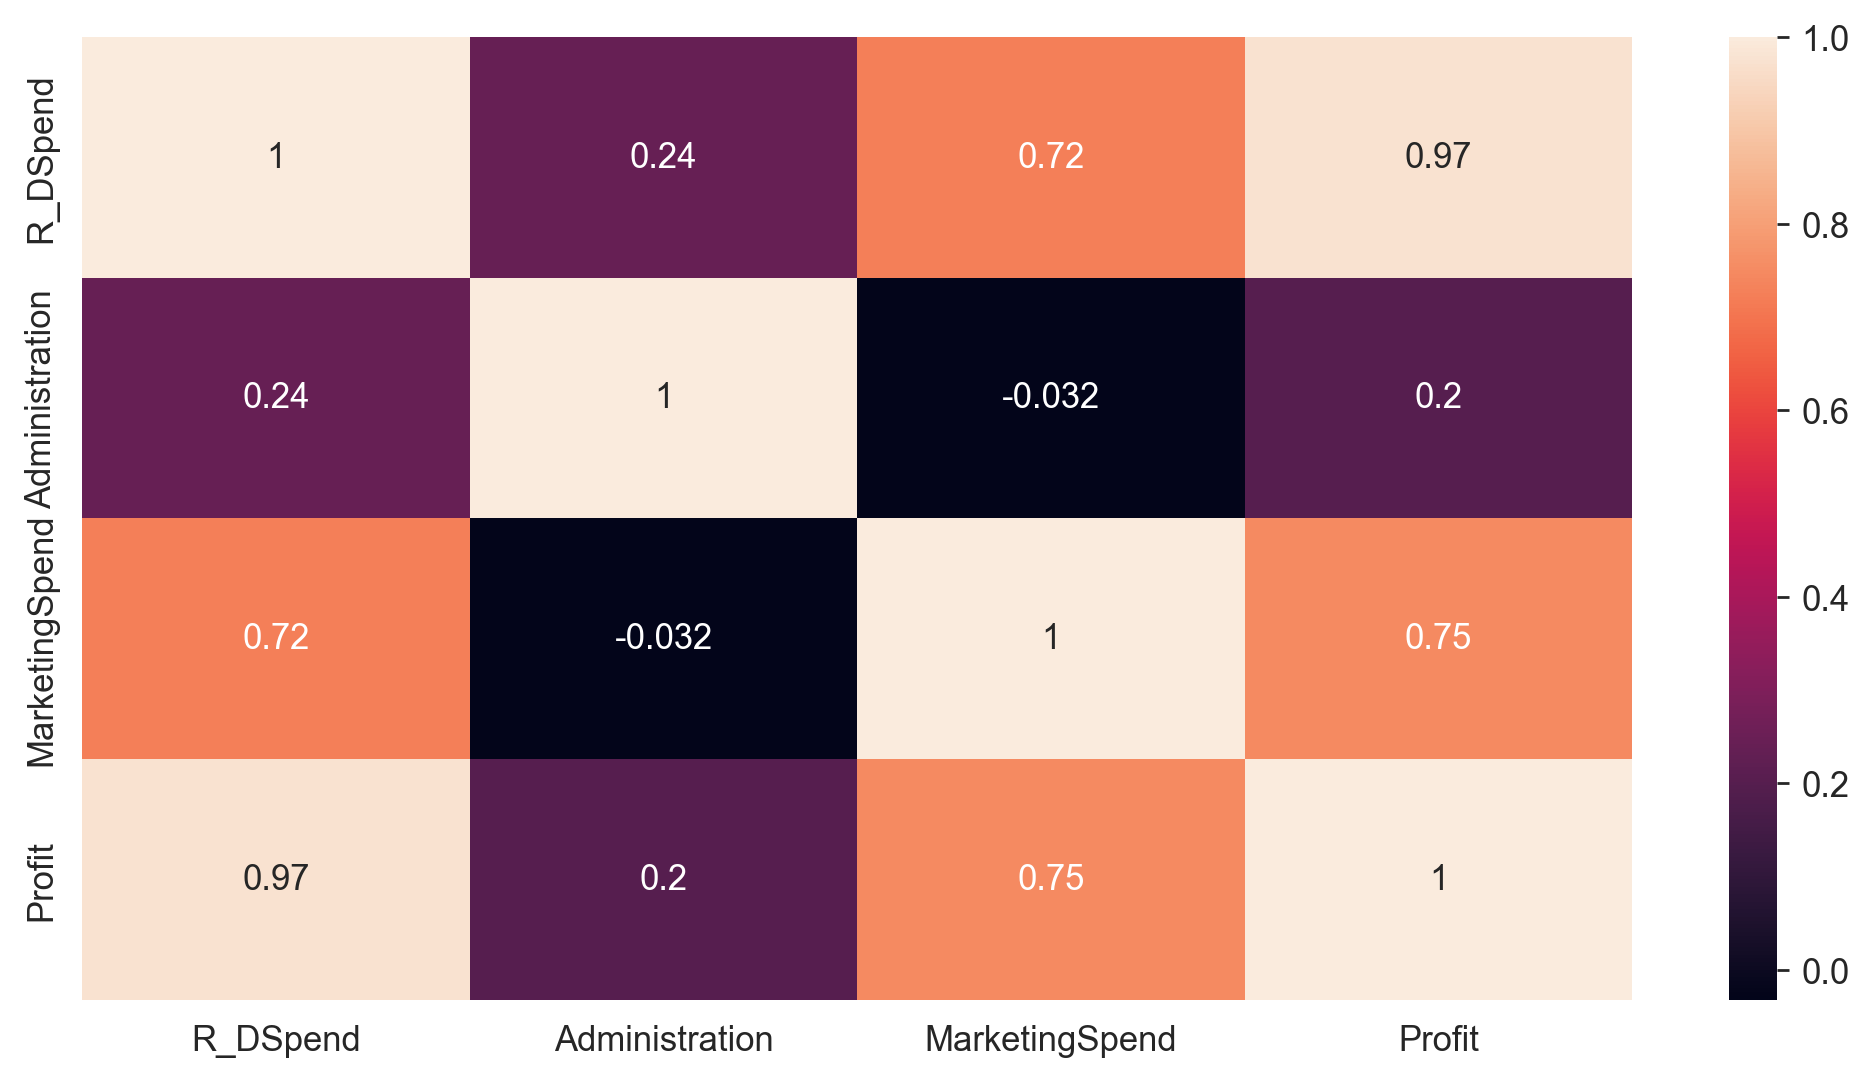

In [10]:
#correlation analysis
sns.heatmap(df.corr(),annot=True)

Model with all the features

In [11]:
model=smf.ols('Profit~ R_DSpend+Administration+MarketingSpend',data=df).fit()

In [12]:
model.pvalues

Intercept         1.057379e-09
R_DSpend          2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64

SIMPLE LINEAR REGRESSION

In [13]:
#R_DSpend
r_dspend=smf.ols('Profit~R_DSpend+Administration',data=df).fit()

In [14]:
r_dspend.pvalues

Intercept         5.695336e-12
R_DSpend          2.278348e-31
Administration    2.888932e-01
dtype: float64

In [15]:
#MarketingSpend
m_spend=smf.ols('Profit~Administration+MarketingSpend',data=df).fit()

In [16]:
m_spend.pvalues

Intercept         2.589341e-01
Administration    1.729198e-02
MarketingSpend    9.727245e-11
dtype: float64

VIF 

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
vif=pd.DataFrame()

vif['VIF']=[variance_inflation_factor(df.values,i)for i in range(len(df.columns))]

In [19]:
vif

,VIF
0,30.156046
1,13.396558
2,9.845142
3,79.627990


In [20]:
vif['features']=df.columns
vif

,VIF,features
0,30.156046,R_DSpend
1,13.396558,Administration
2,9.845142,MarketingSpend
3,79.627990,Profit


# Subset Selection

AIC

In [21]:
r2_value=pd.DataFrame({'Features':('R_DSpend','MarketingSpend'),
                       'rsquared':(r_dspend.rsquared,m_spend.rsquared),
                       'AIC':(r_dspend.aic,m_spend.aic)})
r2_value

,Features,rsquared,AIC
0,R_DSpend,0.947813,1059.663693
1,MarketingSpend,0.609723,1160.264804


# Model Validation Techniques

As the r2 value of R_DSpend column is more and its AIC value is less as compared to MarketingSpend column,the MarketingSpend column will be dropped.

Normality Test

In [22]:
import statsmodels.api as sm

In [23]:
r_dspend.resid

0      2079.649486
1      4749.359826
2      9239.337178
3      9838.385168
4     -6368.626886
5     -6299.223299
6     -7017.651084
7     -3753.952582
8      1284.700786
9     -5696.378405
10     9235.213563
11     7446.155824
12    12524.671567
13     7293.055893
14   -17392.896004
15   -17204.311290
16    11293.919422
17    -3433.440974
18    -3667.525602
19     1521.808934
20     3882.032537
21    -3005.282643
22    -1819.486192
23     1230.682686
24    -7494.149233
25     4164.790343
26    -6456.905185
27    -5267.331867
28     1130.936860
29    -2331.644260
30    -2267.126777
31    -2017.328718
32    -5276.649740
33     -488.456385
34    10158.487187
35     6430.501317
36    17843.425291
37     -213.204647
38    12397.085184
39    -2725.173594
40     4846.063661
41     3354.505431
42     1328.209595
43     8255.270786
44     -602.100738
45    15756.687083
46     -392.222274
47    -5149.882512
48   -16938.371096
49   -34005.613622
dtype: float64

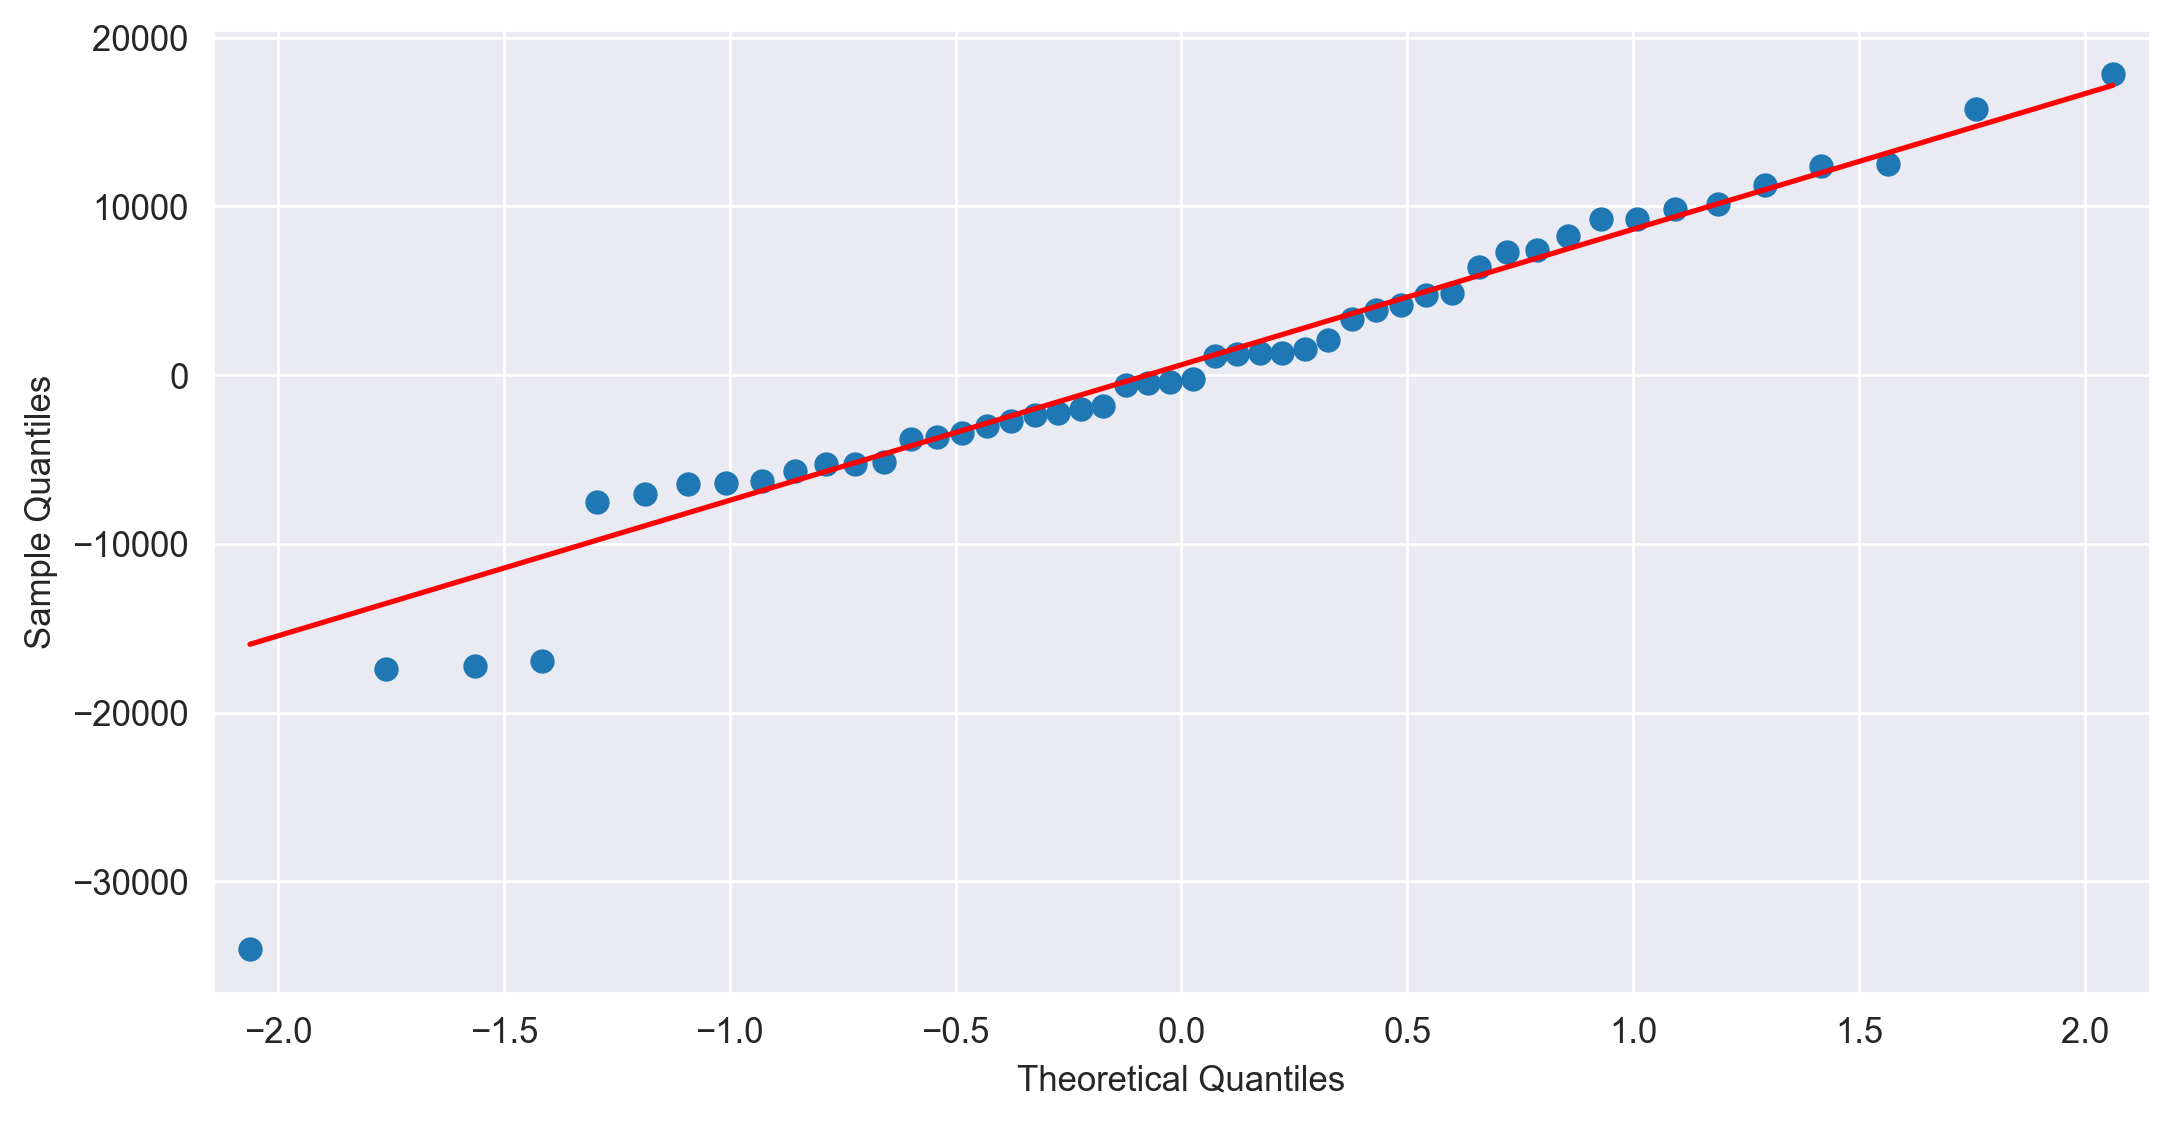

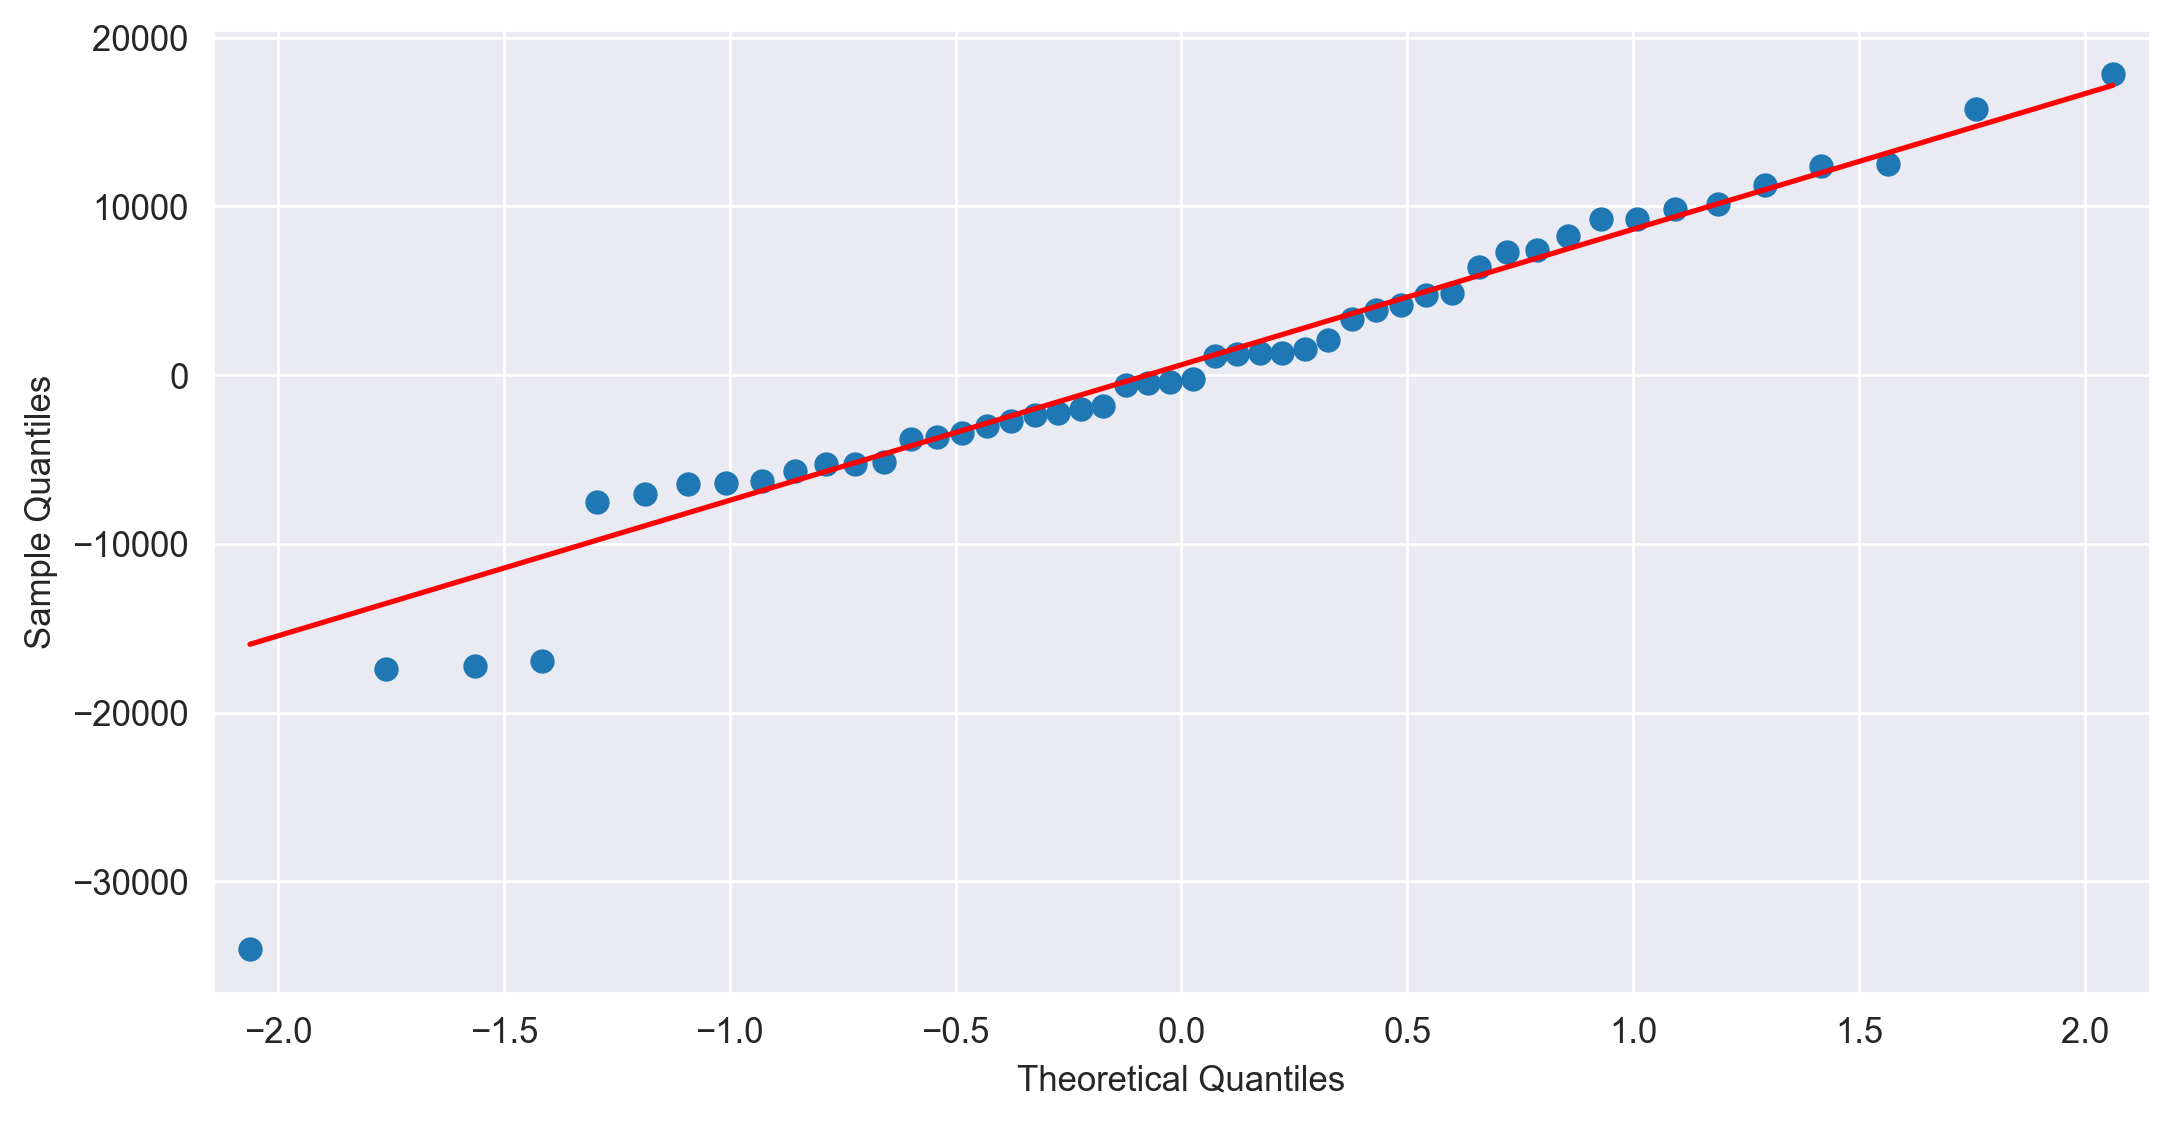

In [24]:
sm.qqplot(r_dspend.resid,line='q')

In [25]:
np.where(r_dspend.resid<-30000)

(array([49], dtype=int64),)

# Residual plot for Homoscedasticity

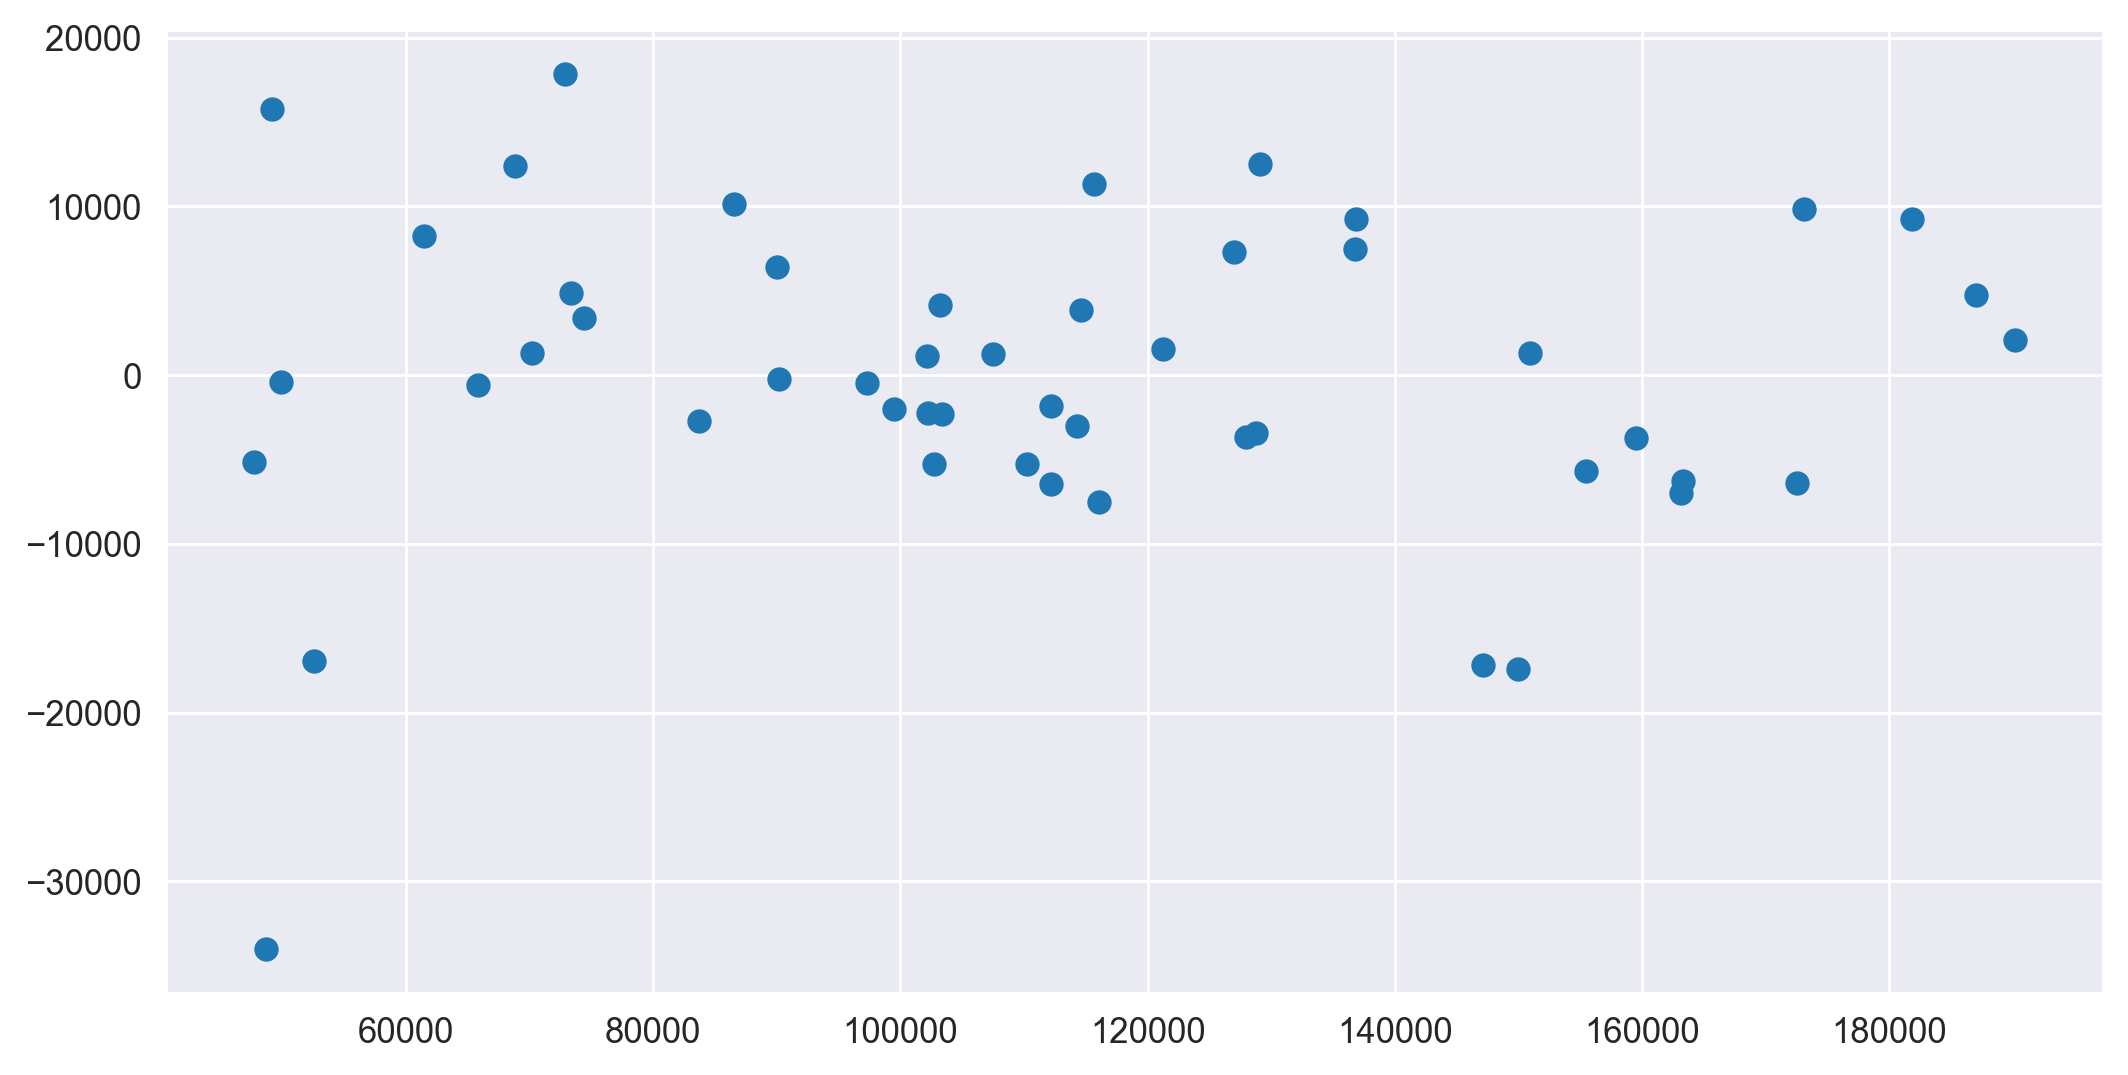

In [26]:
plt.scatter(r_dspend.fittedvalues,r_dspend.resid)

# Residual vs Regressor

eval_env: 1


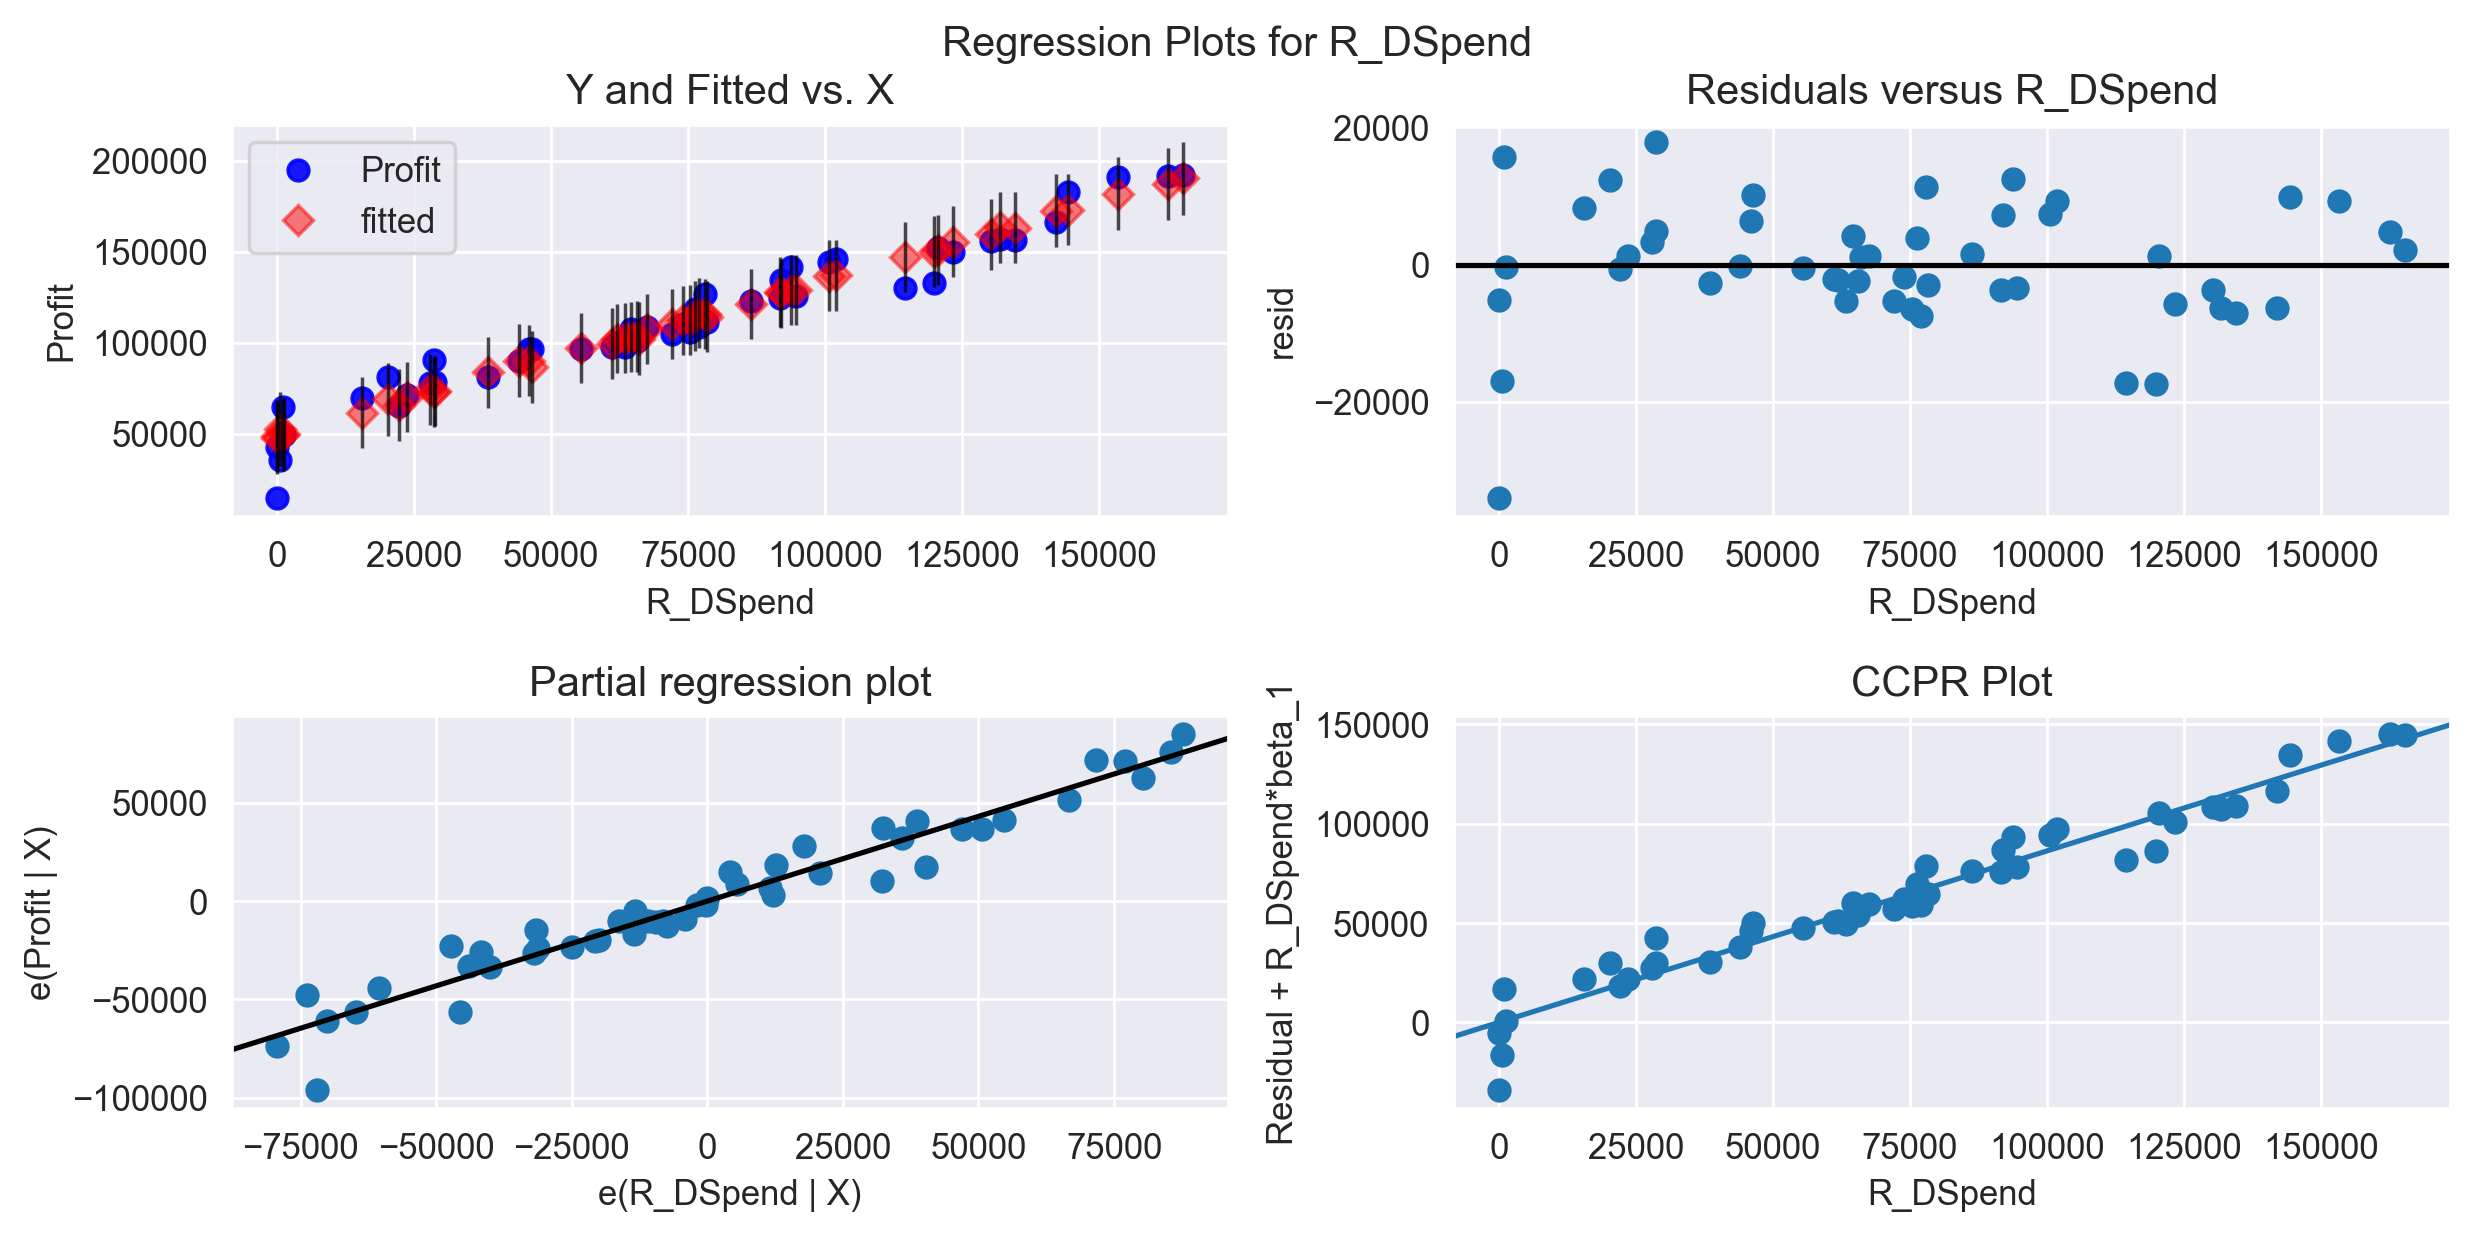

In [27]:
sm.graphics.plot_regress_exog(r_dspend,'R_DSpend');

eval_env: 1


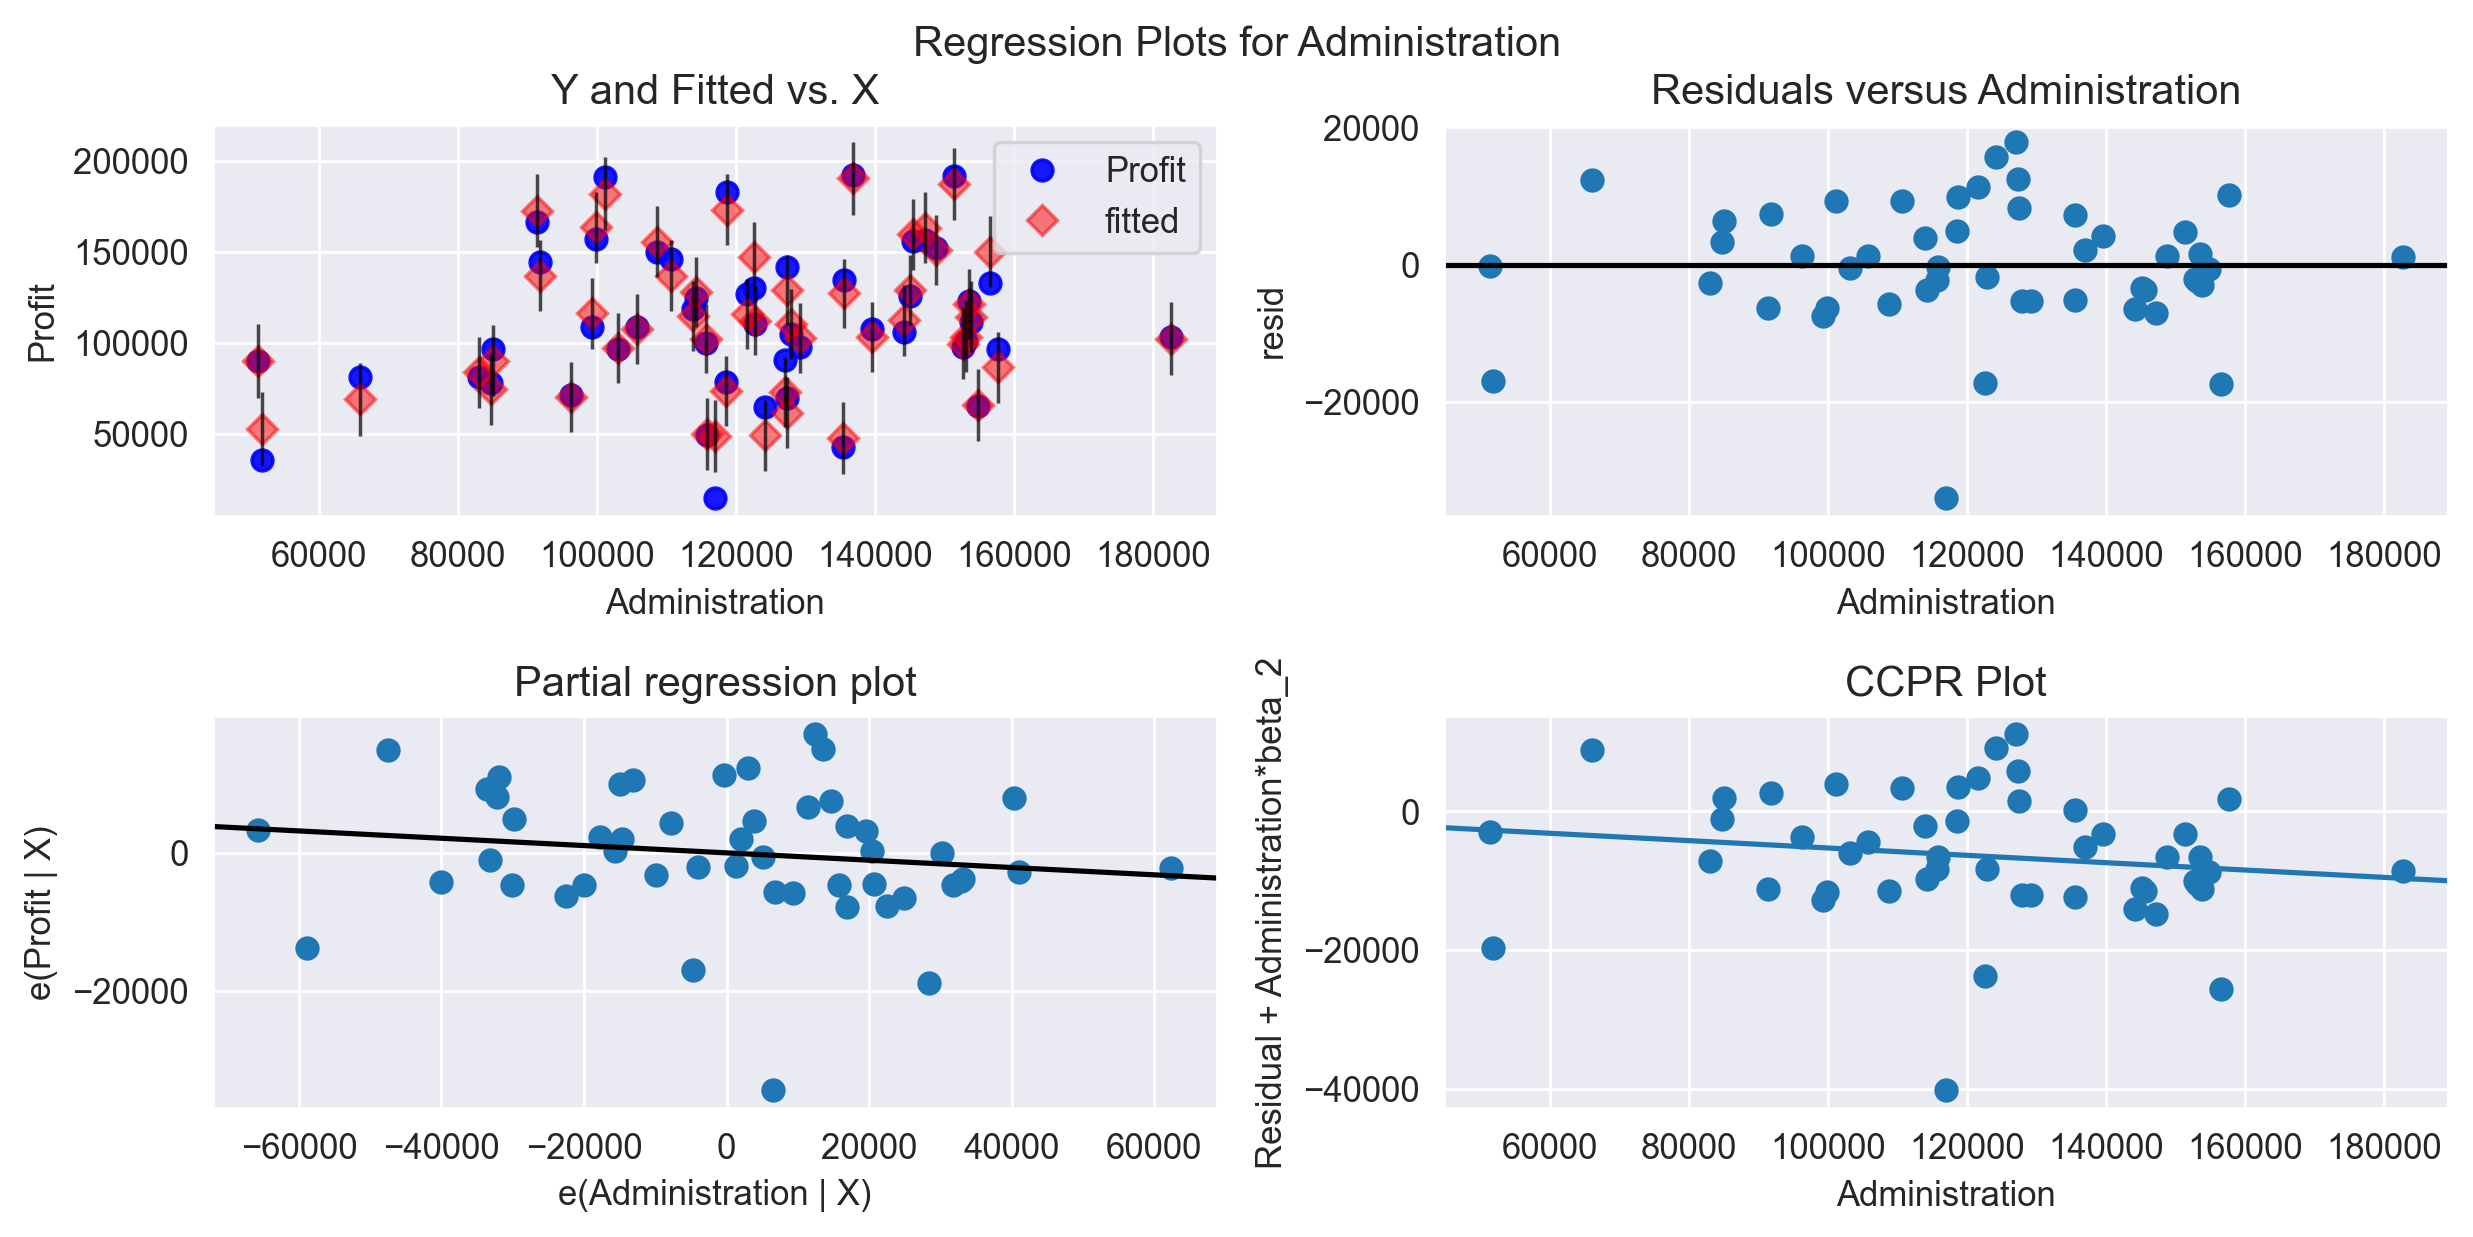

In [28]:
sm.graphics.plot_regress_exog(r_dspend,'Administration');

# Model Deletion Techniques

Cooks distance

In [29]:
modelF=smf.ols('Profit~R_DSpend+Administration',data=df).fit()

In [30]:
inf=modelF.get_influence()
c,p=inf.cooks_distance

In [31]:
c

array([2.04891117e-03, 1.10719705e-02, 4.45970340e-02, 3.10535270e-02,
       2.11438476e-02, 1.36907373e-02, 1.35107805e-02, 3.46841651e-03,
       3.66234828e-04, 7.51800918e-03, 1.16600707e-02, 1.36901599e-02,
       1.50207539e-02, 5.68804702e-03, 8.17568588e-02, 4.42094438e-02,
       1.01122046e-02, 1.72273244e-03, 1.37988343e-03, 4.50957682e-04,
       1.29256181e-03, 1.80511998e-03, 2.60725721e-04, 1.58579967e-04,
       7.75429813e-03, 2.18516446e-03, 5.74156819e-03, 2.32513846e-03,
       8.13668428e-04, 1.14848791e-03, 4.40912370e-04, 8.88021449e-04,
       2.58413417e-03, 2.86214125e-05, 3.26636622e-02, 9.81464013e-03,
       5.76430905e-02, 3.48387257e-05, 8.04974487e-02, 1.98645424e-03,
       3.84314890e-03, 3.15370564e-03, 3.93186682e-04, 1.70395623e-02,
       1.53194084e-04, 8.37159585e-02, 4.81274516e-05, 1.08495170e-02,
       2.61113283e-01, 3.75268147e-01])

<StemContainer object of 3 artists>

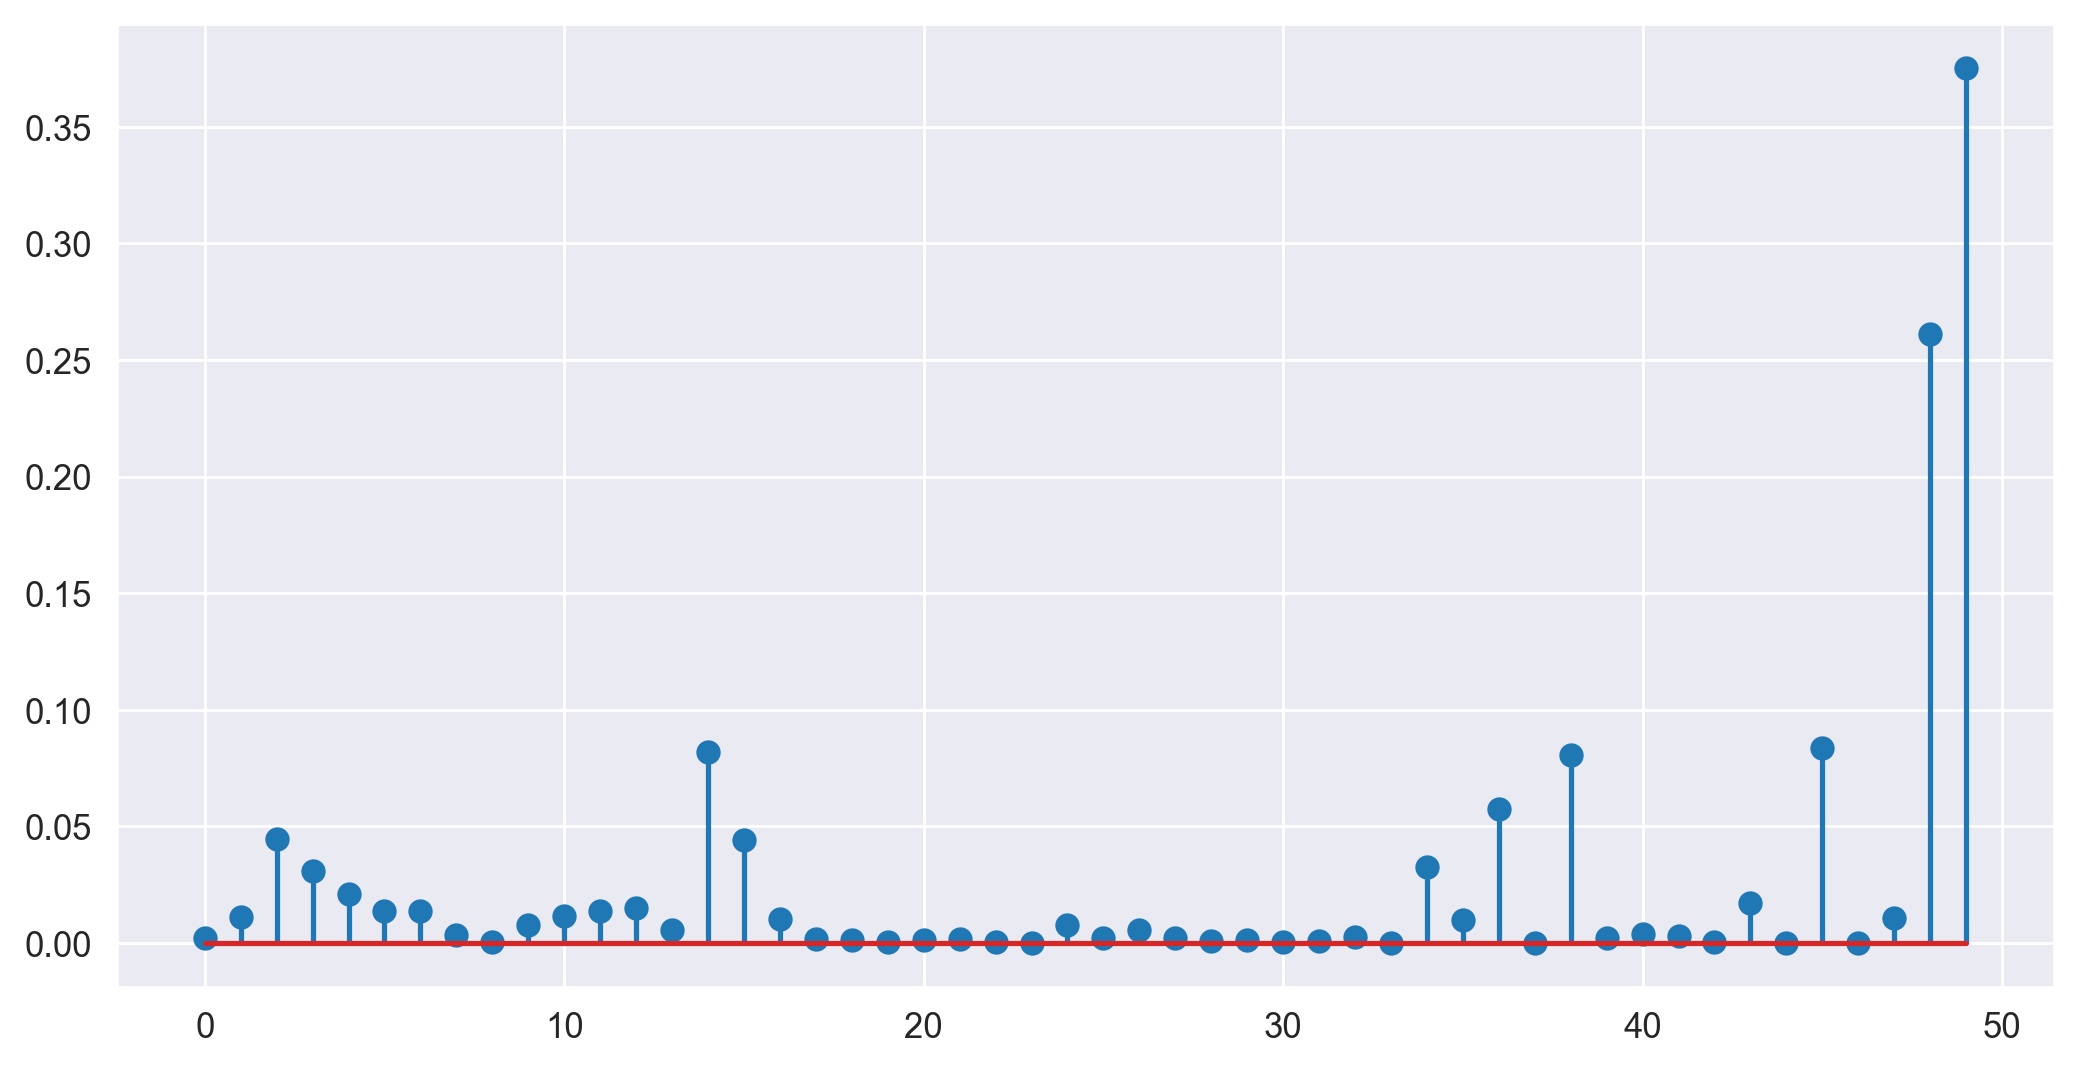

In [32]:
plt.stem(c)

In [33]:
np.argmax(c),np.max(c)

(49, 0.375268146567758)

In [34]:
df.iloc[[49]]

,R_DSpend,Administration,MarketingSpend,Profit
49,0.0,116983.8,45173.06,14681.4


In [35]:
#Influence plot
from statsmodels.graphics.regressionplots import influence_plot

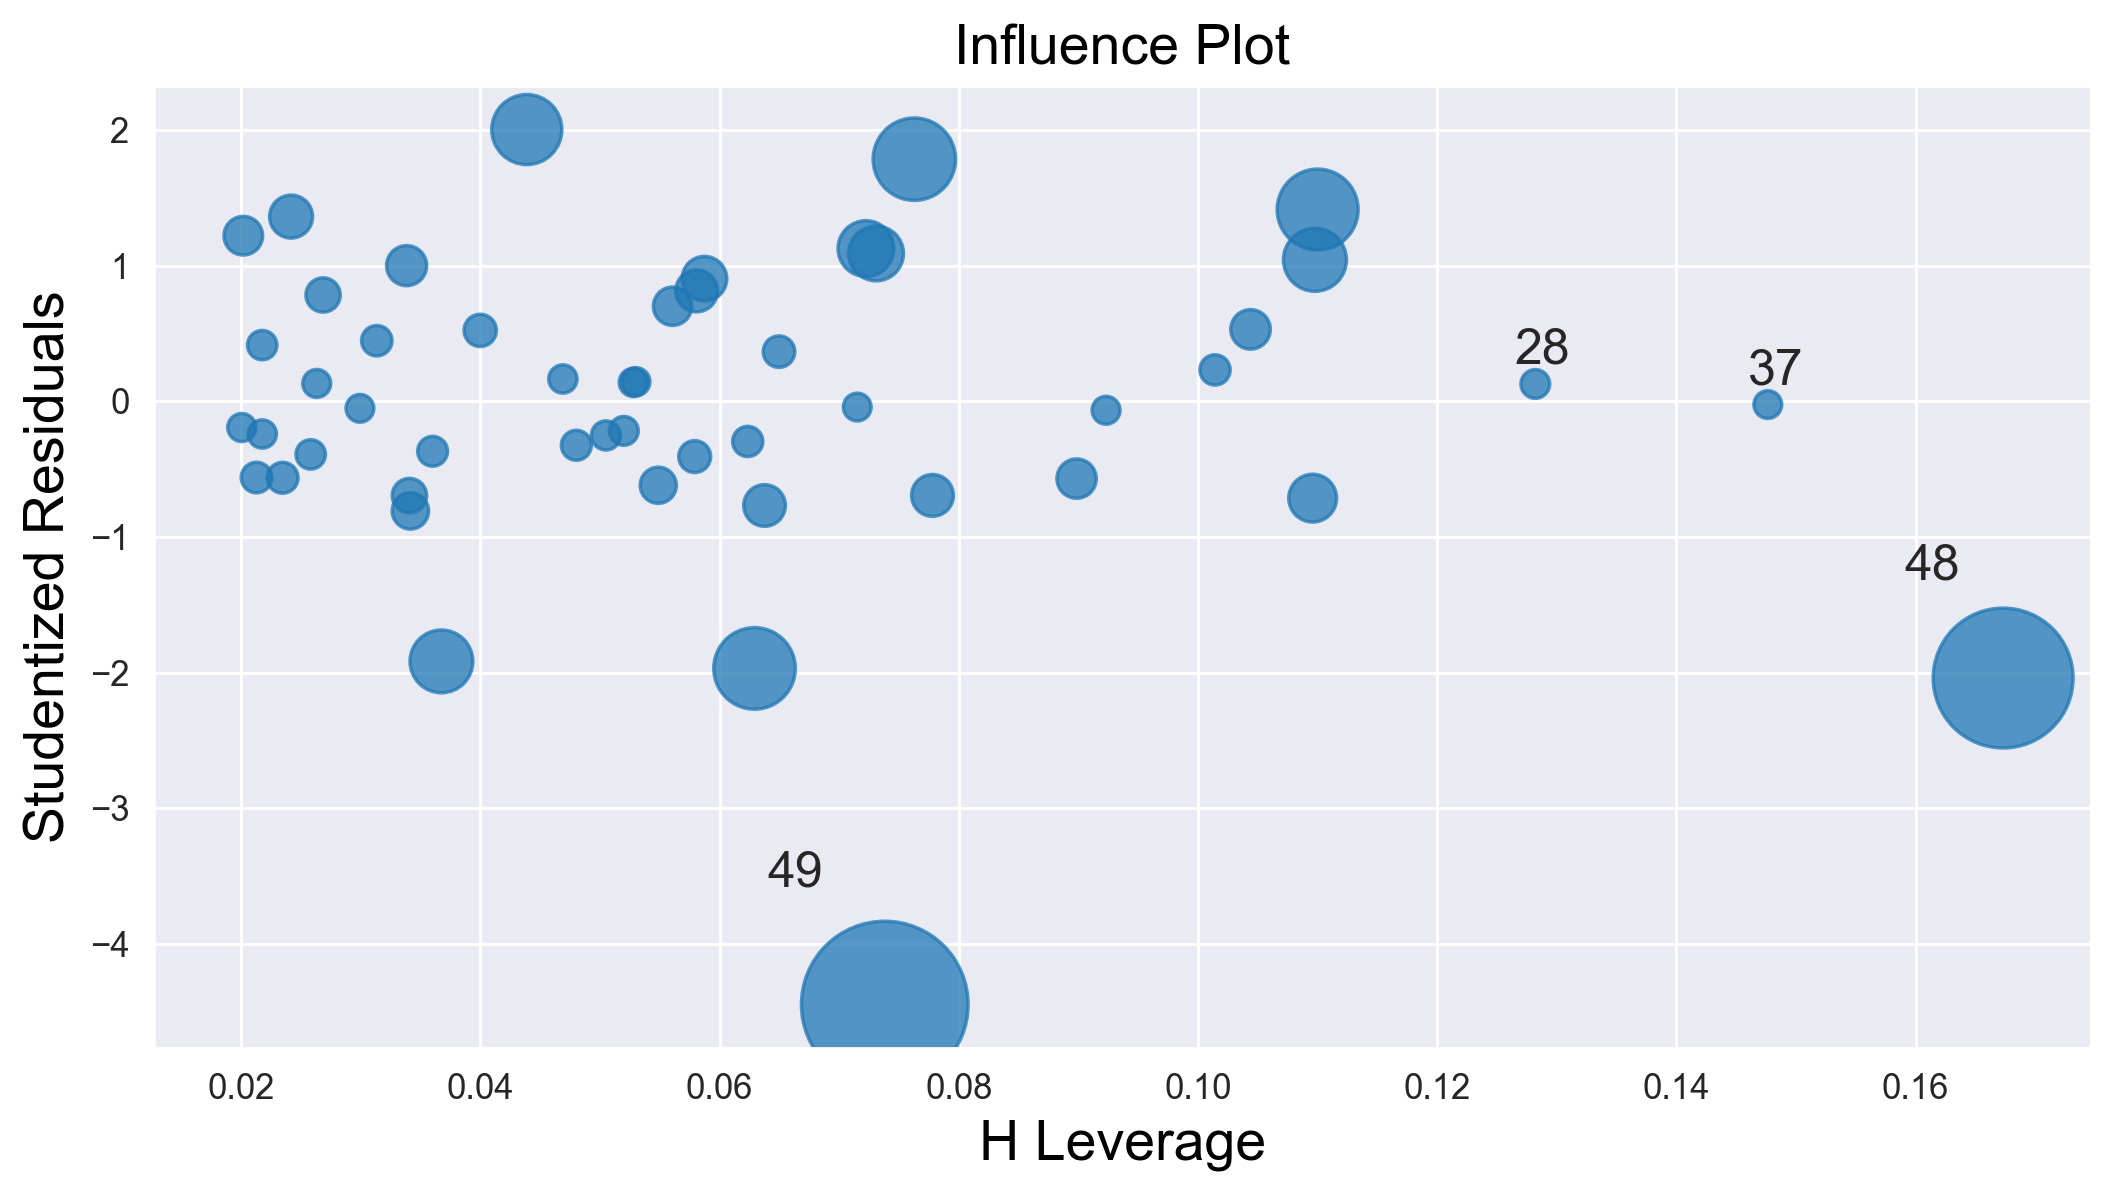

In [36]:
influence_plot(modelF);

In [37]:
df.drop(index=[48,49],inplace=True)

In [38]:
df.tail()

,R_DSpend,Administration,MarketingSpend,Profit
43,15505.73,127382.30,35534.17,69758.98
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73


Final Model
we can stop the diagnostic process and finalize the model

In [39]:
model_final = smf.ols('Profit~R_DSpend+Administration',data=df).fit()

In [40]:
model_final.rsquared

0.9613542664192156

In [41]:
#Predicting new values
df.head()

,R_DSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [42]:
new_df=pd.DataFrame({'R_DSpend':(100000,150000,200000,250000,300000),
                     'Administration':(57361,85231,115326,121563,224895)})
new_df

,R_DSpend,Administration
0,100000,57361
1,150000,85231
2,200000,115326
3,250000,121563
4,300000,224895


In [43]:
model_final.predict(new_df)

0    140223.193696
1    179035.300540
2    217661.116676
3    258284.471564
4    290778.434837
dtype: float64

In [44]:
new_df['Profit']=model_final.predict(new_df)

In [45]:
new_df

,R_DSpend,Administration,Profit
0,100000,57361,140223.193696
1,150000,85231,179035.300540
2,200000,115326,217661.116676
3,250000,121563,258284.471564
4,300000,224895,290778.434837
